In [1]:
#load the macro
%store -r __common_lib

In [2]:
__common_lib

The libraries have been loaded!


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 1. Basic data exploration

### 1.1 general stats

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.2 Remove Outliers

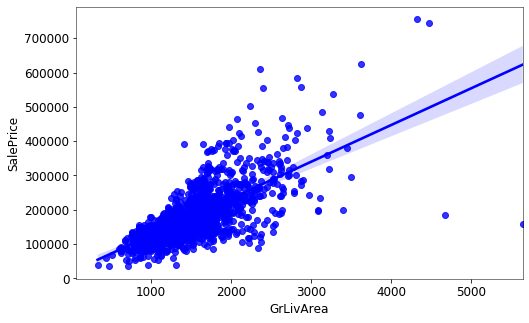

In [6]:
sns.regplot(data=train, x='GrLivArea', y='SalePrice')
plt.show()

In [7]:
# remove two outliers that were sold too cheap for their sizes
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

### 1.3 Transform label to get better statistic attributes

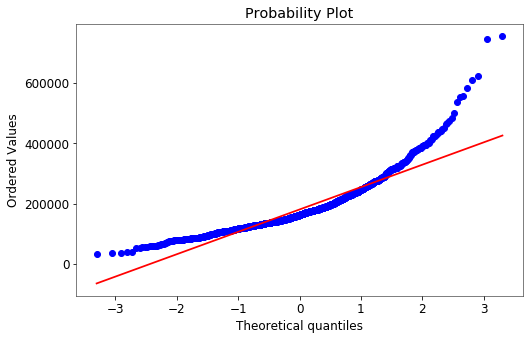

In [8]:
# QQ plot
from scipy import stats
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

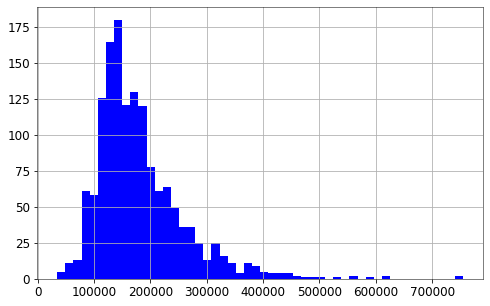

In [9]:
train['SalePrice'].hist(bins=50)
plt.show()

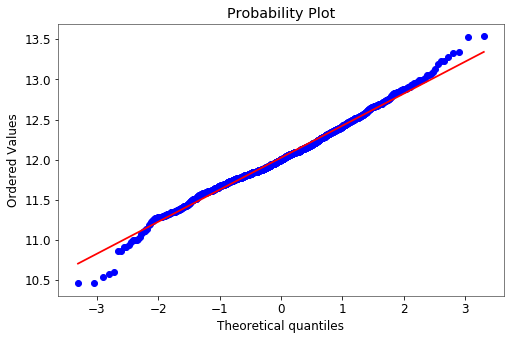

In [10]:
train['SalePrice'] = np.log1p(train['SalePrice'])
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

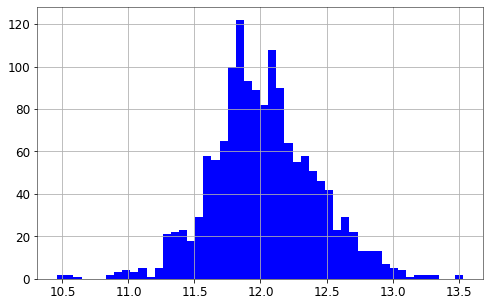

In [11]:
train['SalePrice'].hist(bins=50)

# 2. Preprocessing

## 2.1 Fill NA and transform

In [12]:
def Count_NA(feat_ls):
    """
    show the NA features
    """
    train_df = train[feat_ls].isna().sum()[train[feat_ls].isna().sum()>0]
    train_df.rename('Train',inplace=True)
    test_df = test[feat_ls].isna().sum()[test[feat_ls].isna().sum()>0]
    test_df.rename('Test',inplace=True)
    NA_df = pd.concat([train_df, test_df],axis=1)
    NA_df.fillna(0, inplace=True)
    return NA_df

##### a. Numerical features

In [13]:
num = ['LotFrontage','LotArea','MasVnrArea',
        'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        'OverallQual','OverallCond',
        'YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt',
        '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
        'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
        'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
        'GarageCars','GarageArea',
        'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [14]:
num_NA = Count_NA(num)
num_NA

,Train,Test
LotFrontage,259.0,227
MasVnrArea,8.0,15
GarageYrBlt,81.0,78
BsmtFinSF1,0.0,1
BsmtFinSF2,0.0,1
BsmtUnfSF,0.0,1
TotalBsmtSF,0.0,1
BsmtFullBath,0.0,2
BsmtHalfBath,0.0,2
GarageCars,0.0,1


Note 1 
- fill LotFrontage with 0
- fill MasVnrArea with 0 because NA means no Mas
- fill GarageYrBlt with min of train set
- treat year and month features with caution

In [15]:
# fill nan
num_fill0 = num_NA.index.tolist()
num_fill0.remove('GarageYrBlt')

train[num_fill0] = train[num_fill0].fillna(0)
test[num_fill0] = test[num_fill0].fillna(0)

GarageYr_Min = train['GarageYrBlt'].min()
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(GarageYr_Min)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(GarageYr_Min)

# check nan again
Count_NA(num)

,Train,Test


##### b. String Ordinal

In [16]:
ord_ex = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
          'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC',]
ord_GLQ = ['BsmtFinType1','BsmtFinType2']
ord_oth = ['BsmtExposure','Electrical','Functional','GarageType','GarageFinish','PavedDrive','Fence']
ords = ord_ex + ord_GLQ + ord_oth

In [17]:
# count number of nan
Count_NA(ords)

,Train,Test
BsmtQual,37.0,44.0
BsmtCond,37.0,45.0
FireplaceQu,690.0,730.0
GarageQual,81.0,78.0
GarageCond,81.0,78.0
PoolQC,1452.0,1456.0
BsmtFinType1,37.0,42.0
BsmtFinType2,38.0,42.0
BsmtExposure,38.0,44.0
Electrical,1.0,0.0


In [18]:
# create ordinal mapping
ord_ex_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
ord_GLQ_map = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
BE_map = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
El_map = {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1, 'NA':5} # Standard unless specified
Fn_map = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1, 'NA':8} # Typical unless specified
GT_map = {'2Types':6, 'Attchd':5, 'Basment':4, 'BuiltIn':3, 'CarPort':2, 'Detchd':1, 'NA':0}
GF_map = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
PD_map = {'Y':3, 'P':2, 'N':1, 'NA':0}
Fc_map = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
oth_MAP_ls = [BE_map, El_map, Fn_map, GT_map, GF_map, PD_map, Fc_map]

In [19]:
# replace na with string NA
train[ords] = train[ords].fillna('NA')
test[ords] = test[ords].fillna('NA')
# encode ordinal features
train[ord_ex] = train[ord_ex].replace(ord_ex_map)
train[ord_GLQ] = train[ord_GLQ].replace(ord_GLQ_map)
test[ord_ex] = test[ord_ex].replace(ord_ex_map)
test[ord_GLQ] = test[ord_GLQ].replace(ord_GLQ_map)

for feat, MAP in zip(ord_oth, oth_MAP_ls):
    train[feat] = train[feat].replace(MAP)
    test[feat] = test[feat].replace(MAP)
    
Count_NA(ords)

,Train,Test


##### c. Categorical

In [20]:
cat = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
      'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
      'MasVnrType','Foundation','Heating','CentralAir','MiscFeature','SaleType','SaleCondition']

In [21]:
cat_NA = Count_NA(cat)
cat_NA

,Train,Test
Alley,1367.0,1352
MasVnrType,8.0,16
MiscFeature,1404.0,1408
MSZoning,0.0,4
Utilities,0.0,2
Exterior1st,0.0,1
Exterior2nd,0.0,1
SaleType,0.0,1


- Drop Alley and MiscFeatures for too many missing
- Drop Utility for almost all have the same value

In [22]:
cat_drop = ['Alley','MiscFeature','Utilities']
train.drop(cat_drop, axis=1, inplace=True)
test.drop(cat_drop, axis=1, inplace=True)
for feature in cat_drop:
    cat.remove(feature)

In [23]:
train[cat] = train[cat].fillna('None')
test['SaleType'] = test['SaleType'].fillna(train['SaleType'].mode()[0]) # has to have a sale type
test[cat] = test[cat].fillna('None')

Count_NA(cat)

,Train,Test


## 2.2 Feature Preprocessing

#### 2.2.1. Without Pipeline

##### a). Create Exterial, Basement, Garage, Bathroom, Age and Season when sold

In [24]:
def group_num_features(dataset, drop_crit = False, drop_non_crit = False):
    df = dataset.drop("Id",axis=1)
    epsilon = 0.01
    
    # Sold Age, Last Refreshed, Sold Season,
    df['Age'] = df['YrSold'] - df['YearBuilt']
    df['YrRefreshed'] = df[['YearBuilt','YearRemodAdd']].max(1)
    df['Warm'] = df['MoSold'].isin([5,6,7,8,9,10])*1
    
    # Basement Score
    Bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
    df['BsmtScore'] =  (df['BsmtFinSF1'] * (df['BsmtFinType1']/10 + 1) \
                                     + df['BsmtFinSF2'] * (df['BsmtFinType2']/10 + 1) \
                                     + df['BsmtUnfSF'] * 0.5) \
                                   * (df['BsmtQual']/10 + 1) \
                                   * (df['BsmtCond']/10 + 1) \
                                   * (df['BsmtExposure']/10 + 1)    


    # Garage Score
    Garage = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
    Sqf_per_Car = df['GarageArea'].sum() / df['GarageCars'].sum()
    df['GarageScore'] = df['GarageArea'] \
                                   * df['GarageArea'] / (df['GarageCars'] + epsilon) / Sqf_per_Car \
                                   * (df['GarageFinish']/10 + 1) \
                                   * (df['GarageQual']/10 + 1) \
                                   * (df['GarageCond']/10 + 1) \
                                   / ((df['YrSold'] - df['GarageYrBlt'])//10/100 + 1) # Age Penalty      

    # bathrooms:
    df['Bath'] = df['FullBath'] + df['HalfBath']*0.5
    df['BsmtBath'] = df['BsmtFullBath'] + df['BsmtHalfBath']*0.5
    df['TtlBath'] = df['Bath'] + df['BsmtBath']
    
    # Porch:
    df['PorchAdj'] = df['OpenPorchSF']*0.5 + df['ScreenPorch']*0.75 + df['3SsnPorch'] + df['EnclosedPorch']*1.25
    
    # Total Area
    df['TotalSF'] = df['TotalBsmtSF'] + df['GrLivArea']
    
    if drop_crit:
        df = df.drop(Bsmt+Garage, axis=1)
    if drop_non_crit:
        df = df.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','MoSold'], axis=1)
        
    return df

In [25]:
train1 = group_num_features(train)
test1  = group_num_features(test)

##### Redefine columns grouping

In [26]:
cat_plus = cat + ['YrSold','MoSold','Warm']

new_num = ['Age','YrRefreshed','BsmtScore','GarageScore','Bath','BsmtBath','TtlBath','PorchAdj','TotalSF']
num_plus = num + new_num
num_plus.remove('YrSold')
num_plus.remove('MoSold')


# check if the column count matches
assert len(cat_plus+num_plus+ords)==train1.drop('SalePrice',axis=1).shape[1]

##### b). Reduce Skewness for nemeric features

In [27]:
from scipy.stats import skew
skewed_feats = train1[num_plus].apply(lambda x: skew(x.dropna()))
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewed = skewness[abs(skewness.Skew) > 0.75]
skewed_cols = skewed.index.tolist()
skewed.T

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,GarageYrBlt,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtScore,GarageScore,PorchAdj,TotalSF
Skew,12.560986,2.693554,0.764002,4.24755,0.919955,-0.899127,0.886723,0.812121,8.995688,1.009951,4.095895,4.480268,1.544214,2.337421,3.083987,10.28651,4.11469,15.932532,24.434913,1.420725,2.562419,2.030194,0.81624


In [28]:
# log transform the skewed numeric features
train1a = train1.copy()
test1a = test1.copy()
train1a[skewed.index] = np.log1p(train1a[skewed.index])
test1a[skewed.index] = np.log1p(test1a[skewed.index])

Function:

In [29]:
def FixSkewness(df, col_list = skewed_cols):
    df[skewed_cols] = np.log1p(df[skewed_cols])
    return df

In [30]:
train1b = train1.copy()
train1b[num_plus] = FixSkewness(train1b[num_plus].copy())

In [31]:
train1a.equals(train1b)

True

Transformer:

In [32]:
# Turn num_feature_grouping function into a transformer:
from sklearn.preprocessing import FunctionTransformer
FeatureGroupTransformer = FunctionTransformer()

D:\Programs\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [33]:
SkewnessFixTransformer = FunctionTransformer(FixSkewness, kw_args={'col_list':skewed_cols})

In [34]:
train1c = train1.copy()
train1c[num_plus] = SkewnessFixTransformer.fit_transform(train1c[num_plus].copy())
train1a.equals(train1c)

True

##### c). One-Hot transform categorical features for linear regression

expand the cat features to include `Yrsold` and `MoSold`

In [35]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False,handle_unknown='ignore')
train_1hot = onehot.fit_transform(train1[cat_plus])
test_1hot = onehot.transform(test1[cat_plus])

##### d). Scale numeric features

In [36]:
from sklearn.preprocessing import StandardScaler

StdScl = StandardScaler()
train_num_std = StdScl.fit_transform(train1a[num_plus])
test_num_std = StdScl.transform(test1a[num_plus])

train_ord_std = StdScl.fit_transform(train1[ords])
test_ord_std = StdScl.transform(test1[ords])

##### e). Concatenate all columns together

`cat_plus` + `num_plus` + `ords` + `SalePrice` = all columns from `train1`

In [37]:
X_train1 = np.hstack([train_num_std, train_ord_std, train_1hot])
X_test1 = np.hstack([test_num_std, test_ord_std, test_1hot])
y_train = train1['SalePrice']
X_train1.shape, X_test1.shape

((1458, 250), (1459, 250))

#### 2.2.2 Build pipeline

##### a). Feature 

In [38]:
X_train2 = train1.drop('SalePrice',axis=1)
X_test2 = test1.copy()

In [39]:
#### create a transformer for feature selection
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self[attribute_names]]

##### b). num pipelie:
- log transform skew
- standard scale

In [40]:
from sklearn.pipeline import make_pipeline
num_pipe = make_pipeline(
                        FunctionTransformer(FixSkewness),
                        StdScl)

##### c). combine 3 groups of feature

In [41]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipe, num_plus),
        ("ord", StdScl, ords),
        ("cat", onehot, cat_plus)
    ])

In [42]:
X_train2 = full_pipeline.fit_transform(X_train2)
X_test2 = full_pipeline.transform(X_test2)

In [43]:
np.array_equal(X_train1, X_train2), np.array_equal(X_test1, X_test2)

(True, True)

# 3. Training Models

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def RMSE_CV(model, dtrain=X_train1):
    kfold = KFold(n_splits=5, shuffle=True, random_state=22).get_n_splits(dtrain)
    RMSEs = -cross_val_score(model, dtrain, y_train, scoring='neg_root_mean_squared_error', cv=kfold)
    return (RMSEs.mean().round(4), RMSEs.std().round(4))

D:\Programs\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 3.1 ElasticNet

In [45]:
from sklearn.linear_model import ElasticNetCV

kfold = KFold(n_splits=5, shuffle=True, random_state=22).get_n_splits(X_train1)

ENet_cv = ElasticNetCV(
    alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 13],
    l1_ratio=[0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
    max_iter = 50000, cv = kfold)

In [46]:
ENet_cv.fit(X_train1, y_train)

ElasticNetCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03,
                     0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 13],
             copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
             max_iter=50000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [47]:
ENet_cv.alpha_, ENet_cv.l1_ratio_

(0.0006, 0.7)

In [48]:
RMSE_CV(ENet_cv)

(0.1103, 0.0051)

In [49]:
print('ElasticNet Column Selection:', sum(ENet_cv.coef_ == 0), '/', len(ENet_cv.coef_))

ElasticNet Column Selection: 132 / 250


## 3.2 xgboost

In [50]:
import xgboost
xgb_reg = xgboost.XGBRegressor()

D:\Programs\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [51]:
from scipy.stats import reciprocal
param_dict = {'max_depth':[3,4,5,6,7,8],
              'subsample':reciprocal(0.5,1),
              'colsample_bytree':reciprocal(0.5,1),
              'eta':reciprocal(0.1,0.5),
              'min_child_weight':reciprocal(0.01,0.4)}

In [84]:
from sklearn.model_selection import RandomizedSearchCV
xgb_cv = RandomizedSearchCV(xgb_reg, param_dict, n_iter=500, n_jobs=-1, cv=kfold,random_state=22, 
                            verbose=1, scoring='neg_root_mean_squared_error')

In [85]:
xgb_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  6.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'eta': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F0F5A49F08>,
                                        'max_depth': [3, 4, 5, 6, 7

In [86]:
-xgb_cv.best_score_.round(4)

0.1156

In [87]:
xgb_cv.best_params_

{'colsample_bytree': 0.580734696241111,
 'eta': 0.1420533882635536,
 'max_depth': 3,
 'min_child_weight': 0.2871461999726112,
 'subsample': 0.8140279715386463}

### try xgb's built-in CV (not able to tune hyper-params, but enables early stopping)

In [56]:
dtrain = xgboost.DMatrix(X_train1, label=y_train)

In [57]:
params = {'max_depth':3,
              'subsample':0.8,
              'colsample_bytree':0.6,
              'eta':0.15,
              'min_child_weight':0.3}

In [58]:
cv_results = xgboost.cv(
    params,
    dtrain,
    num_boost_round=1000,
    seed=42,
    nfold=kfold,
    metrics={'rmse'},
    early_stopping_rounds=10
)

In [59]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
122,0.065308,0.001009,0.117445,0.006048
123,0.065013,0.000997,0.117419,0.006169
124,0.064777,0.000985,0.117385,0.006219
125,0.064508,0.000915,0.117369,0.006178
126,0.064264,0.000976,0.117359,0.006177


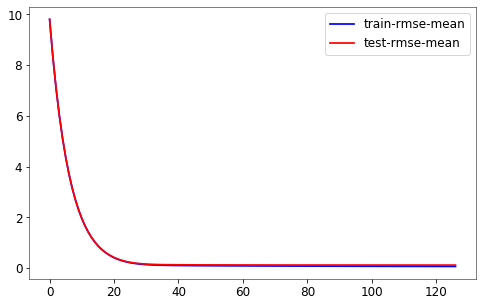

In [60]:
cv_results[['train-rmse-mean','test-rmse-mean']].plot()

## 3.3 LightGBM

In [119]:
import lightgbm as lgb
lgb_reg = lgb.LGBMRegressor()

In [120]:
lgb_cv = RandomizedSearchCV(lgb_reg, param_dict, n_iter=200, n_jobs=-1, cv=kfold,random_state=22, 
                            verbose=1, scoring='neg_root_mean_squared_error')

In [121]:
lgb_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:   14.0s


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.3344948129859369 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   16.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silen...
                                        'eta': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F0F5A49F08>,
             

In [122]:
lgb_cv.best_params_

{'colsample_bytree': 0.5604282664981467,
 'eta': 0.3344948129859369,
 'max_depth': 4,
 'min_child_weight': 0.014198924345772072,
 'subsample': 0.7570642963890317}

In [123]:
-lgb_cv.best_score_.round(4)

0.1184

## 3.4 Simple Voting

In [124]:
type(lgb_cv.best_estimator_)

lightgbm.sklearn.LGBMRegressor

In [125]:
from sklearn.ensemble import VotingRegressor
vote_reg = VotingRegressor([('enet', ENet_cv),
                           ('xgb', xgb_cv.best_estimator_),
                           ('lgb', lgb_cv.best_estimator_)])

In [126]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train1, y_train, random_state=111, test_size = 0.2, shuffle=True)

In [127]:
X_tr.shape, y_tr.shape

((1166, 250), (1166,))

In [128]:
vote_reg.fit(X_tr, y_tr)
y_val_pred = vote_reg.predict(X_val)

In [131]:
from sklearn.metrics import mean_squared_error
val_rmse = mean_squared_error(y_val_pred, y_val)
(val_rmse/0.2).round(4)

0.0732

# 4 output

In [145]:
y_test_pred = np.expm1(vote_reg.predict(X_test1))

In [146]:
output = pd.DataFrame(y_test_pred.round(2), columns=['SalePrice'])
output.set_index(test['Id'], inplace=True)
output.head()

,SalePrice
Id,
1461,122670.35
1462,163066.60
1463,181325.07
1464,190853.84
1465,190368.63


In [147]:
output.to_csv('submission_3.csv')